# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План
 *Открыть файл с данными и изучить общую информацию*
 
 *Подготовить данные*
 
* Заменить названия столбцов (привести к нижнему регистру);
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
* Обработать пропуски при необходимости
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец

*Провести исследовательский анализ данных*

* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Взять данные за соответствующий актуальный период. Актуальный период определить самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывать в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы.
* Соотнесьти выводы с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

*Составить портрет пользователя каждого региона:*

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

*Проверить гипотезы*

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

*Общий вывод*

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [6]:
data.duplicated().sum() == 0 

True

In [7]:
data.duplicated(subset=['Name','Platform']).sum()

5

In [8]:
data = data.drop_duplicates(subset=['Name','Platform'], keep='first')

### Вывод по обзору данных
* Названия колонок необходимо привести к одному регистру.
* Пропуски в данных заполнить если необходимо
* Явных дубликатов в данных нет
* Дубликаты для пары "Имя-Игровая консоль" найдены в количестве 5, удалены, так как если игра переиздавалась на той же консоли к ней добавляется или приписка Deluxe Edition(если добавлены дополнения) или Remastered ( при улучшении качества графики)
* Данные колонок даты и оценок критиков и пользователей не в подходящих форматах

## Подготовка данных

### Замена названия столбцов (приведение к нижнему регистру)

In [9]:
data.columns = data.columns.str.lower()

### Преобразование данных и обработка пропусков

Данные для года выпуска приведены к правильному формату даты с последующим иднесированием по году (если вдруг в каких то из вариантов записи был указан не только год(так как данные были в типе float) и в последующем приведены к типу Integer, так как о годах говорят как о целых числах. Оставлять в формате даты смысло не было так как есть только год.

In [10]:
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year
data['year_of_release'] = data['year_of_release'].round(0).astype('Int64')

In [11]:
data = data.dropna(subset=['year_of_release'])

Пропуски в данных года удалены ,так как составляют меньше 2% от общего числа и не повлияют на анализ данных.

Пропуски в стобце имени совпадают с стобцом жанра - замене не подлежат-удалены. Появление их могло быть связано с ошибкой при внесении данных.

In [12]:
data = data.dropna(subset=['name'])

Так как показатель оценки критиков является качественной переменной( порядковой), то пропущенные значения в ячейке будут заменены на -1 (группа для пропущенных значений).
Значения могли быть пропущены по ошибке сбора и внесения данных или по причине не существования на момент выхода игры оценивающего издания , или игра просто не оценивалась в связи с тем что была неинтересна изданию из-за малого спроса. Так как все оценки целочисленные то данные приведены к типу Integer.

In [13]:
data['critic_score'] = data['critic_score'].fillna(-1)
data['critic_score'] = data['critic_score'].round(0).astype('Int64')

Так как показатель оценки пользователей является качественной переменной( порядковой), то пропущенные значения в ячейке "оценка пользователей" будут заменены на -1 (группа для пропущенных значений).
Значения могли быть пропущенны по технологическим причинам , или просто не была представлена на сайте агригаторе по типу metacritic где пользователи могли поставить оценки(так же чтобы оценка могла отображаться,количество отзывов должно пройти определенный порог, и если игра не популярна,то даже при наличии отзывов оценка могла быть не сформирована из-за их малочисленности).
Знаечение TBD(to be discussed) -подлежит обсуждению, означает что страница игры на сайте есть,но опять же количество оценок для формирования средней слишком мало. Данные значения тоже переводим как -1 ,что позволит нам всю колонку привести из типа object в float(так как значения не целочисленны).

In [14]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].fillna(-1)
data['user_score'] = data['user_score'].astype('float', errors='ignore')

Пропуски в рейтинги игр заменены на аббревиатуру RP - rating pending ,которая используется ESRB (Entertainment Software Rating Board). Данная абревиатура означет ,что рейтинга для игры на данный момент нет,что является логичной заглушкой для пропусков, так как срединные значения даже в разбивке по жанрам не отражают возможных различий в играх и исказят дальнейшие результаты.

In [15]:
data['rating'] = data['rating'].fillna('RP')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16441 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     16441 non-null  Int64  
 9   user_score       16441 non-null  float64
 10  rating           16441 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


In [16]:
data.isna().sum().sort_values()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### Подсчёт суммарных продаж по всем регионам 

In [17]:
data['summary_sales'] = data['jp_sales']+data['na_sales']+data['eu_sales']+data['other_sales']

### Вывод
* Все названия столбцов приведены к нижнему регистру
* Пропуски в столбцах названия и жанра удалены,так как не подлежат заполнению
* Пропуски в оценке критиков заменены на значение -1 ,чтобы в последующем данные можно было привести к типу `Integer`  и отделить от остальных данных игры без оценки критиков.
* Аналогичная замена проведена для столбца оценки пользоваетелей  с заменой и значений `TBD(to be discussed)`. Так как данные по оценкам пользоватлей не целые числа,после замены пропусков все данные данного столбца приведены к типу `float`.
* Данные колонки с годом выпуска игры переведены в тип данных date  с последующим индексированием года. Пропуски в данных удалены из-за немногочисленности(менее 2%) и невозможности адекватного заполнения.
* Пропуски в рейтинги игр заменены на аббревиатуру `RP` - rating pending ,которая используется ESRB (Entertainment Software Rating Board).
* Добавлена колонка `summary_sales` с суммарными продажами для каждой игры по всем регионам

## Исследовательский анализ данных
### Посмотрим сколько игр выпускалось в каждом году

Text(0.5, 0, 'Год выхода')

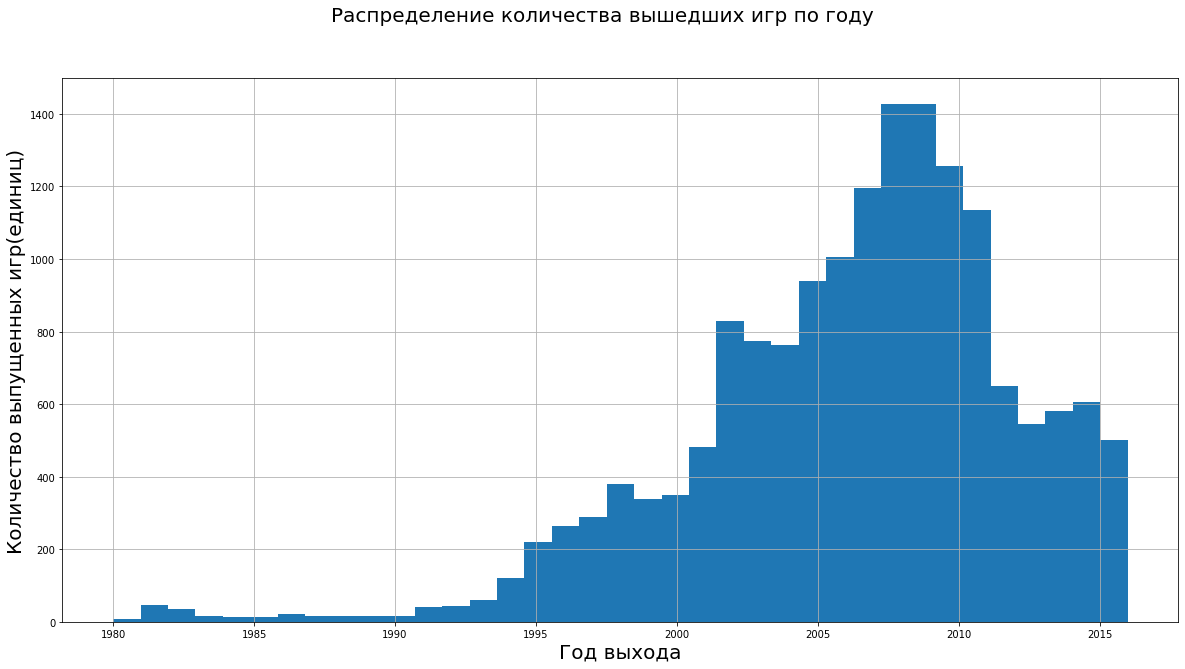

In [18]:
plt.figure(figsize=(20, 10))
data['year_of_release'].hist(bins=37)
plt.suptitle('Распределение количества вышедших игр по году', fontsize=20)
plt.ylabel('Количество выпущенных игр(единиц)', fontsize=20)
plt.xlabel('Год выхода', fontsize=20)

### Вывод 
До начала 90х. количество игр минимально и держится примерно на одном уровне ,когда к 95 начинается подъем. Максимальное количество игр выпускалось в промежутке от 2001 до 2012.Пик в 2007-2008 годах с последующим спадом. В 90х количество возможностей "железа" было значительно меньше, пос равнению с теми же 00, не говоря про 10ые. Поэтому после 00 идет большой рост по количеству выпускаемых игр влоть до 2008-КРИЗИС. Людям и компаниям не до покупки и не производства-показатели падают постепенно,то что должно было выйти в 2008-2010 и было уже в активном производстве выходит,а вот потом стагнация,из которой рынок начинает выходить только после 2013.

### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [19]:
data_consoles_sales = data.pivot_table(index=['platform'],values = ['summary_sales'],aggfunc = 'sum')
data_consoles_sales.sort_values('summary_sales', ascending=False).head(10)

,summary_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [20]:
ps2_sales = data.loc[data['platform'] == 'PS2'].pivot_table(index=['year_of_release'],
                                                            values = ['summary_sales'],aggfunc = 'sum')
ps2_sales

,summary_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


In [21]:
x360_sales = data.loc[data['platform'] == 'X360'].pivot_table(index=['year_of_release'],
                                                              values = ['summary_sales'],aggfunc = 'sum')
x360_sales

,summary_sales
year_of_release,
2005,7.00
2006,51.62
2007,95.41
2008,135.26
2009,120.29
2010,170.03
2011,143.84
2012,99.74
2013,88.58


In [22]:
ps3_sales = data.loc[data['platform'] == 'PS3'].pivot_table(index=['year_of_release'],
                                                            values = ['summary_sales'],aggfunc = 'sum')
ps3_sales

,summary_sales
year_of_release,
2006,20.96
2007,73.19
2008,118.52
2009,130.93
2010,142.17
2011,156.78
2012,107.35
2013,113.25
2014,47.76


In [23]:
wii_sales = data.loc[data['platform'] == 'Wii'].pivot_table(index=['year_of_release'],
                                                            values = ['summary_sales'],aggfunc = 'sum')
wii_sales

,summary_sales
year_of_release,
2006,137.15
2007,152.77
2008,171.32
2009,206.97
2010,127.95
2011,59.65
2012,21.71
2013,8.59
2014,3.75


In [24]:
ds_sales = data.loc[data['platform'] == 'DS'].pivot_table(index=['year_of_release'],
                                                          values = ['summary_sales'],aggfunc = 'sum')
ds_sales

,summary_sales
year_of_release,
1985,0.02
2004,17.27
2005,130.14
2006,119.81
2007,146.94
2008,145.31
2009,119.54
2010,85.02
2011,26.18


### Вывод
Средний срок жизни консоли 11 лет,с максимальными продажами в течение 5-7 лет от момента релиза.

### Возьмём данные за соответствующий актуальный период.  
Так как основные тенденции в продаже игр на консолях варьируются от 5 до 7 лет,возьмём промежуток времени прошедшей пятилетки,тем самым захватив консоли которые будут в 2017 в конце и в середине своего жизненного цикла. Данные перевдём в новую переменную `data_new_consoles`

In [25]:
data_new_consoles = data.loc[data['year_of_release'] >= 2012]
data_new_consoles_platforms = data_new_consoles.pivot_table(index=['platform','year_of_release'],
                                                            values = ['summary_sales'],aggfunc = 'sum')
data_new_consoles_platforms.sort_values('platform')

summary_sales
platform year_of_release               
3DS      2012                     51.36
         2013                     56.57
         2014                     43.76
         2015                     27.78
         2016                     15.14
DS       2012                     11.01
         2013                      1.54
PC       2016                      5.25
         2014                     13.28
         2015                      8.52
         2012                     23.14
         2013                     12.38
PS3      2012                    107.35
         2013                    113.25
         2014                     47.76
         2015                     16.82
         2016                      3.60
PS4      2016                     69.25
         2013                     25.99
         2014                    100.00
         2015                    118.90
PSP      2014                      0.24
         2015                      0.12
         2012                      7.69
         2013                      3.14
PSV      2012                     16.19
         2013                     10.59
         2014                     11.90
         2015                      6.25
         2016                      4.25
Wii      2012                     21.71
         2013                      8.59
         2014                      3.75
         2015                      1.14
         2016                      0.18
WiiU     2016                      4.60
         2015                     16.35
         2012                     17.56
         2013                     21.65
         2014                     22.03
X360     2012                     99.74
         2013                     88.58
         2014                     34.74
         2015                     11.96
         2016                      1.52
XOne     2015                     60.14
         2013                     18.96
         2014                     54.07
         2016                     26.15

### Вывод
Потенциально прибыльными будут консоли нового поколения PS4,XOne так как они находятся в середине своего "жизненного цикла", так как прожади по остальным консолям падают. Так же в расчёт стоит брать персональные компьютеры,так как за последнию пятилетку продажи игр для них держатся на среднем уровне с небольшими отклонениями(но стабильно).

### График «ящик с усами» по глобальным продажам игр в разбивке по перспективным платформам

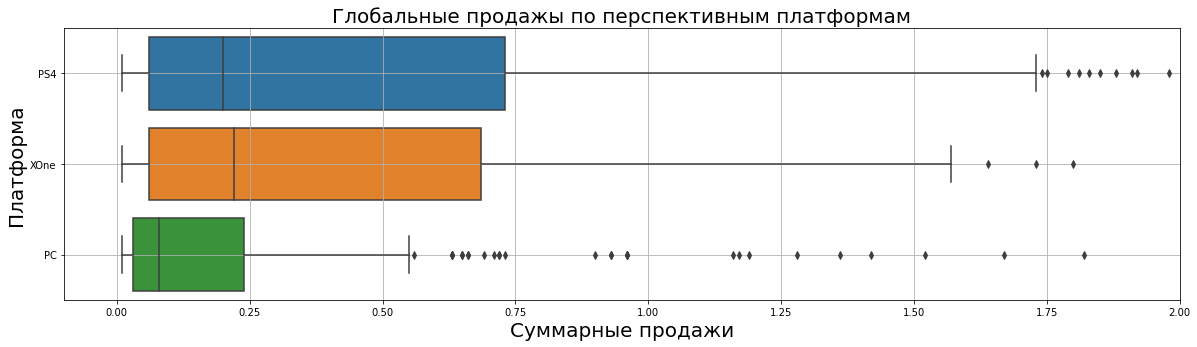

In [26]:

platforms = ['PS4', 'XOne', 'PC']
top_three = data_new_consoles[data_new_consoles['platform'].isin(platforms)]

plt.figure(figsize=(20, 5))
plt.xlim(-0.1, 2)
plt.title('Глобальные продажы по перспективным платформам', fontsize=20)
sns.boxplot(x='summary_sales', y='platform', data=top_three)
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Суммарные продажи', fontsize=20)
plt.grid(True);

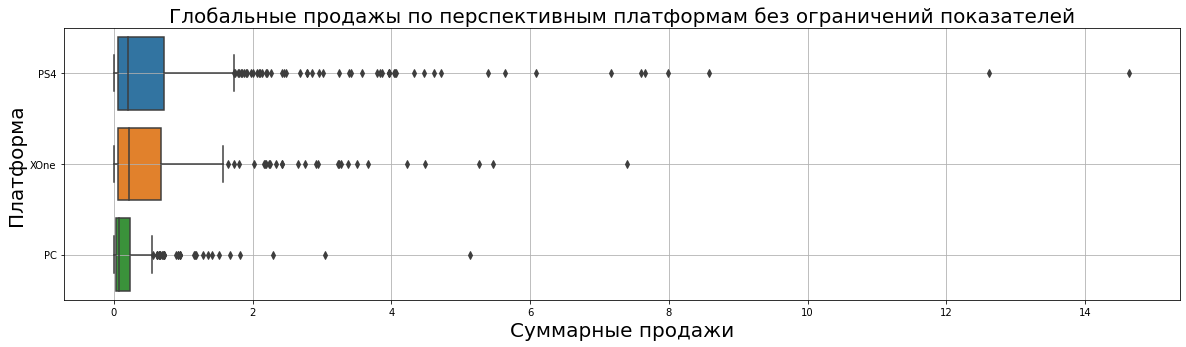

In [27]:
plt.figure(figsize=(20, 5))
plt.title('Глобальные продажы по перспективным платформам без ограничений показателей', fontsize=20)
sns.boxplot(x='summary_sales', y='platform', data=top_three)
plt.ylabel('Платформа', fontsize=20)
plt.xlabel('Суммарные продажи', fontsize=20)
plt.grid(True);

### Вывод
Продажи для PS4 и XOne в целом схожи с небольшим отрывом по количеству для PS4 и более высоким медианным значением для консоли компании майкрософт. Игры на компьютеры значительно остают от двух главных конкурирующих платформ.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для консоли с самым большим количеством выпущенных игр из тройки лидеров на 2017 год- PS4, не беря в расчёт игры без рейтинга критиков и пользователей. Сформулируем выводы.

In [28]:
top_one = top_three.loc[(top_three['platform'] == 'PS4')&
                        (top_three['user_score'] != -1)&
                        (top_three['critic_score'] != -1)]

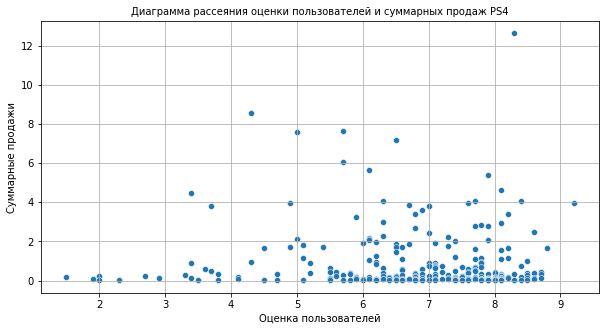

In [29]:
plt.figure(figsize=(10, 5))
plt.title('Диаграмма рассеяния оценки пользователей и суммарных продаж PS4', fontsize=10)
sns.scatterplot(x='user_score', y='summary_sales', data=top_one)
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка пользователей')
plt.grid(True)


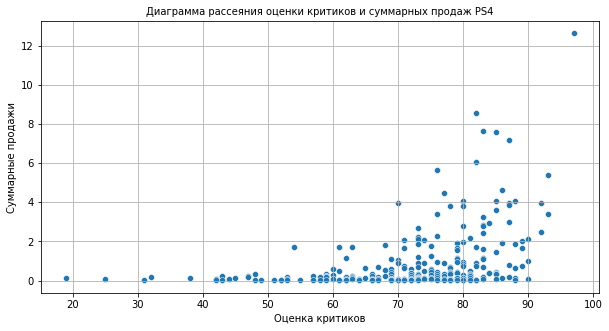

In [30]:
plt.figure(figsize=(10, 5))
plt.title('Диаграмма рассеяния оценки критиков и суммарных продаж PS4', fontsize=10)
sns.scatterplot(x='critic_score', y='summary_sales', data=top_one)
plt.ylabel('Суммарные продажи')
plt.xlabel('Оценка критиков')
plt.grid(True);

In [31]:
cor_critic = top_one['summary_sales'].corr(top_one['critic_score'].astype('float'))
cor_user = top_one['summary_sales'].corr(top_one['user_score'])
print('PS4: Коэффицент корреляции для отзывов критиков - ', cor_critic)
print('PS4: Коэффицент корреляции для отзывов пользователей - ', cor_user )

PS4: Коэффицент корреляции для отзывов критиков -  0.40589480145836687
PS4: Коэффицент корреляции для отзывов пользователей -  -0.03362497596528878


### Вывод
* Диаграмма рассеяния для пользовательских оценок более разнообразна чем критиков, что свидельствует что высокие оценки критиков соотносятся с высоки продажами игр ,в отличие от пользовательских шде такой прямой связи нет.
* Данное наблюдение нам похволяет подтвердить положительный ( в отличие от пользовательского) коэффициент корреляции суммарных продаж и оценки критиков.

### Соотнесём выводы с другими платформами

In [32]:
second_one = top_three.loc[(top_three['platform'] == 'XOne')&
                           (top_three['user_score'] != -1)&
                           (top_three['critic_score'] != -1)]
cor_critic_xone = second_one['summary_sales'].corr(second_one['critic_score'].astype('float'))
cor_user_xone = second_one['summary_sales'].corr(second_one['user_score'])
print('XboxOne: Коэффицент корреляции для отзывов критиков - ', cor_critic_xone)
print('XboxOne: Коэффицент корреляции для отзывов пользователей - ', cor_user_xone )

XboxOne: Коэффицент корреляции для отзывов критиков -  0.4104220356129637
XboxOne: Коэффицент корреляции для отзывов пользователей -  -0.09400318326920852


In [33]:
third_one = top_three.loc[(top_three['platform'] == 'PC')&
                          (top_three['user_score'] != -1)&
                          (top_three['critic_score'] != -1)]
cor_critic_pc = third_one['summary_sales'].corr(third_one['critic_score'].astype('float'))
cor_user_pc = third_one['summary_sales'].corr(third_one['user_score'])
print('PC: Коэффицент корреляции для отзывов критиков - ', cor_critic_pc)
print('PC: Коэффицент корреляции для отзывов пользователей - ', cor_user_pc )

PC: Коэффицент корреляции для отзывов критиков -  0.23747488112576556
PC: Коэффицент корреляции для отзывов пользователей -  -0.13505469037844284


### Вывод
Корреляция для оценок пользователей и критиков с прожадами для XboX  в целом такая же как и для PS4,а вот для пользователей компютеров влияние оценок критиков уже слабее,как и оценки пользователей.

### Посмотрим на общее распределение игр по жанрам. 

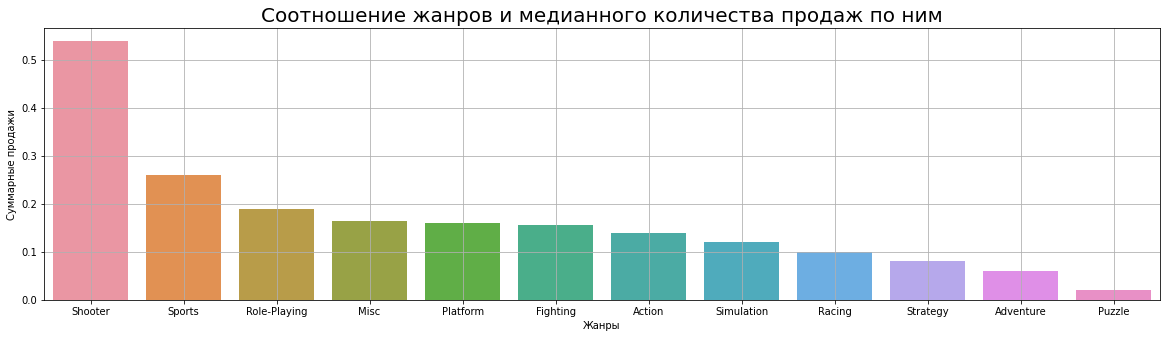

In [34]:
genres = top_three.pivot_table(index='genre', 
                               values='summary_sales', 
                               aggfunc='median').sort_values(by='summary_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение жанров и медианного количества продаж по ним', fontsize=20)
sns.barplot(x='genre', y='summary_sales', data=genres)
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанры')
plt.grid(True);

### Вывод
Лидирующими по продажам являются игры жанра шутер, на втором месте спортивные игры и закрывает тройку лидеров ролевые игры. Паззлы в последнюю пятилетку успезом не пользуются как и стратегические игры и игры жанра adventure (пик популярности данных игр прошёл).

## Составим портрет пользователя каждого региона

### Самые популярные платформы (топ-5). 

In [35]:
jp_top_platform = data_new_consoles.pivot_table(index = 'platform', 
                                                values = 'jp_sales' , 
                                                aggfunc='sum').sort_values('jp_sales', ascending = False)
jp_top_platform['percent'] = ((jp_top_platform['jp_sales'] / jp_top_platform['jp_sales'].sum())* 100).round(1)
jp_top_platform

,jp_sales,percent
platform,,
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8
PSP,10.47,5.4
DS,3.72,1.9
Wii,3.39,1.8
X360,1.57,0.8


In [36]:
eu_top_platform = data_new_consoles.pivot_table(index = 'platform', 
                                                values = 'eu_sales' , 
                                                aggfunc='sum').sort_values('eu_sales', ascending = False)
eu_top_platform['percent'] = ((eu_top_platform['eu_sales'] / eu_top_platform['eu_sales'].sum())* 100).round(1)
eu_top_platform

,eu_sales,percent
platform,,
PS4,141.09,27.8
PS3,106.85,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4
PC,37.70,7.4
WiiU,25.13,5.0
Wii,11.92,2.4
PSV,11.36,2.2


In [37]:
na_top_platform = data_new_consoles.pivot_table(index = 'platform', 
                                                values = 'na_sales' , 
                                                aggfunc='sum').sort_values('na_sales', ascending = False)
na_top_platform['percent'] = ((na_top_platform['na_sales'] / na_top_platform['na_sales'].sum())* 100).round(1)
na_top_platform

,na_sales,percent
platform,,
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4
WiiU,38.10,6.4
PC,19.12,3.2
Wii,17.45,3.0
PSV,10.98,1.9


### Вывод

*Для Японии самыми популярными платформами являются с процентом продаж в регионе:*
* 3DS - 45.5%
* PS3 - 18.3%
* PSV - 10.9% 
* PS4 - 8.3% 
* WIIU - 6.7% 

*Для Европейского региона самыми популярными платформами являются с процентом продаж в регионе:*

* PS4 - 27.7% 
* PS3 - 21.1% 
* XBOX360 - 14.7%
* XONE - 10.1%
* 3DS - 8.4% 

*Для Северной Америки самыми популярными платформами являются с процентом продаж в регионе:*

* XBOX360 - 23.7%
* PS4 - 18.3%
* PS3 - 17.5%
* XONE - 15.7%
* 3DS - 9.4%

### Самые популярные жанры (топ-5). 

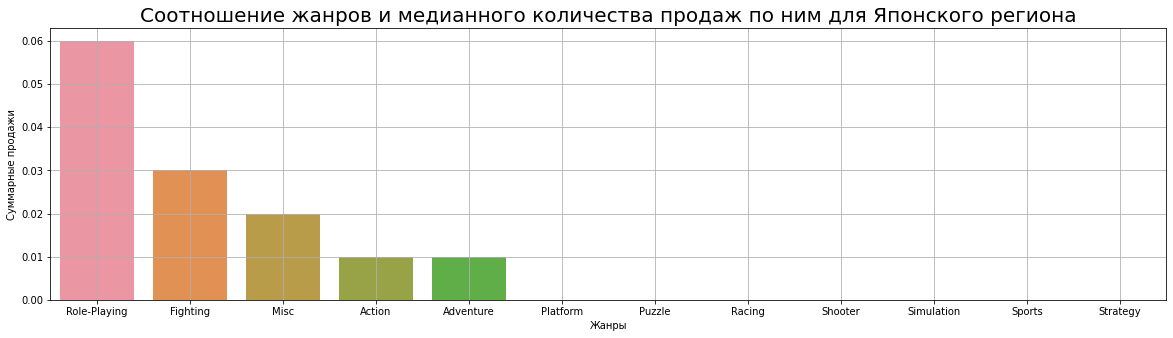

In [38]:
genres_jp = data_new_consoles.pivot_table(index='genre', 
                                          values='jp_sales', 
                                          aggfunc='median').sort_values(by='jp_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение жанров и медианного количества продаж по ним для Японского региона', fontsize=20)
sns.barplot(x='genre', y='jp_sales', data=genres_jp)
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанры')
plt.grid(True);

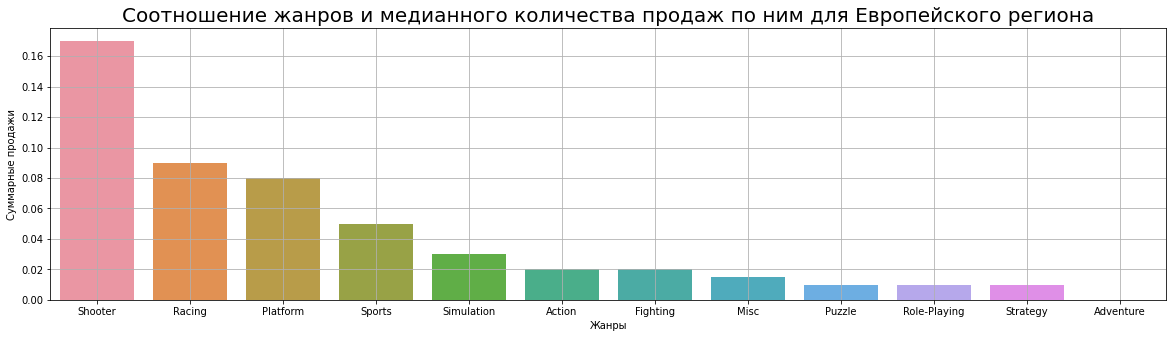

In [39]:
genres_eu = data_new_consoles.pivot_table(index='genre', 
                                          values='eu_sales', 
                                          aggfunc='median').sort_values(by='eu_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение жанров и медианного количества продаж по ним для Европейского региона', fontsize=20)
sns.barplot(x='genre', y='eu_sales', data=genres_eu)
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанры')
plt.grid(True);

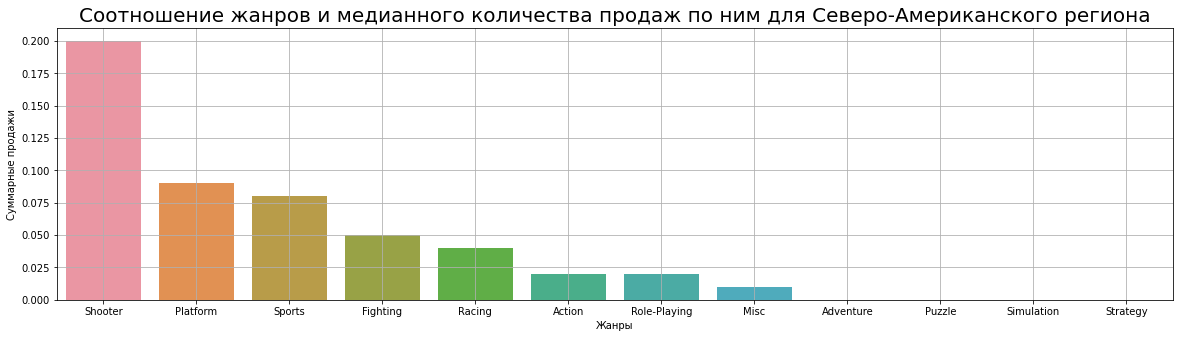

In [40]:
genres_na = data_new_consoles.pivot_table(index='genre', 
                                          values='na_sales', 
                                          aggfunc='median').sort_values(by='na_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение жанров и медианного количества продаж по ним для Северо-Американского региона', fontsize=20)
sns.barplot(x='genre', y='na_sales', data=genres_na)
plt.ylabel('Суммарные продажи')
plt.xlabel('Жанры')
plt.grid(True);

### Вывод
* Для Японии самыми популярными жанрами являются:`role-playing`, `fighting`, `misc`, `action`, `adventure`
* Для Европейского региона самыми популярными жанрами являются: `shooter`,`racing`,`platform`,`sports`,`simulation`
* Для Северной Америки самыми популярными платформами являются:`shooter`,`platform`,`sports`,`fighting`,`racing`

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

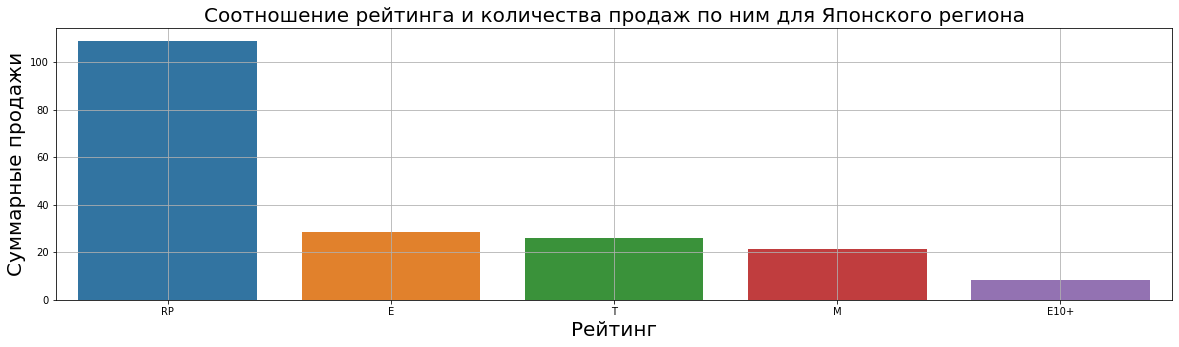

In [41]:
rating_jp = data_new_consoles.pivot_table(index='rating', 
                                          values='jp_sales', 
                                          aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение рейтинга и количества продаж по ним для Японского региона', fontsize=20)
sns.barplot(x='rating', y='jp_sales', data=rating_jp)
plt.ylabel('Суммарные продажи',fontsize=20)
plt.xlabel('Рейтинг',fontsize=20)
plt.grid(True);

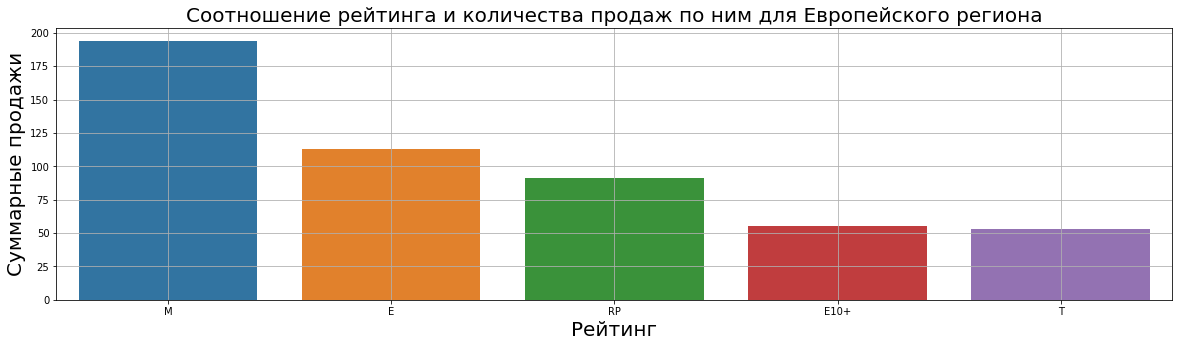

In [42]:
rating_eu = data_new_consoles.pivot_table(index='rating', 
                                          values='eu_sales', 
                                          aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение рейтинга и количества продаж по ним для Европейского региона', fontsize=20)
sns.barplot(x='rating', y='eu_sales', data=rating_eu)
plt.ylabel('Суммарные продажи',fontsize=20)
plt.xlabel('Рейтинг',fontsize=20)
plt.grid(True);

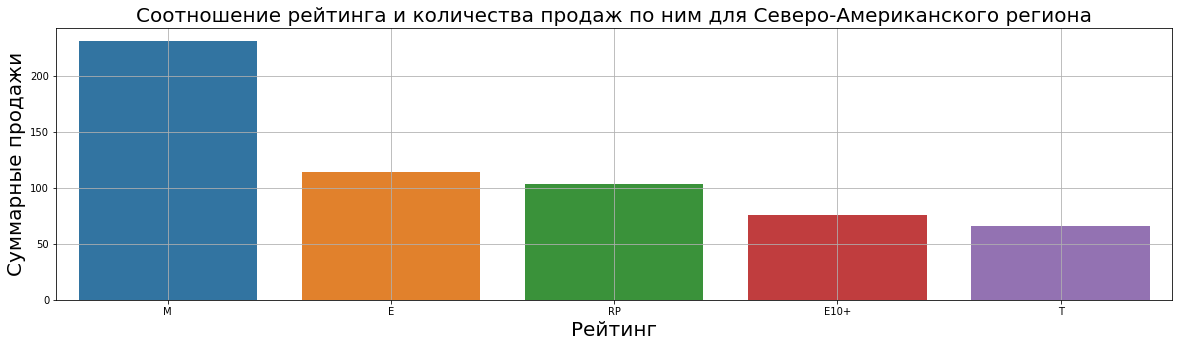

In [43]:
rating_na = data_new_consoles.pivot_table(index='rating', 
                                          values='na_sales', 
                                          aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
plt.figure(figsize=(20, 5))
plt.title('Соотношение рейтинга и количества продаж по ним для Северо-Американского региона', fontsize=20)
sns.barplot(x='rating', y='na_sales', data=rating_na)
plt.ylabel('Суммарные продажи',fontsize=20)
plt.xlabel('Рейтинг',fontsize=20)
plt.grid(True);

### Вывод
Список аббревиатур для рейтинга:
- «T» («Teen») — «Подросткам»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «E» («Everyone») — «Для всех»
- «EC» («Early childhood») — «Для детей младшего возраста»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»


- Для Японии самыми популярными являются игры с возрастным ограничением: RP, E, T, M, E10+
- Для Европейского региона самыми популярными являются игры с возрастным ограничением: M, E, RP,E10+,T
- Для Северной Америки самыми популярными являются игры с возрастным ограничением: M, E, RP, E10+, T

## Проверим гипотезы

In [44]:
alpha = 0.05
data_user_scores = data_new_consoles.loc[data_new_consoles['user_score'] != -1]

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- H₁: Средние пользовательские рейтинги платформ Xbox One и PC не равны. 

In [45]:
result = st.ttest_ind(data_user_scores.query('platform == "XOne"')['user_score'],
                      data_user_scores.query('platform == "PC"')['user_score'],
                      equal_var=False)

print('Значение p-value: ', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Значение p-value:  0.5065901030514671
Не отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

* H₀: Средние пользовательские рейтинги жанра Action равны cредним пользовательским рейтингам жанра Sports.
* H₁: Средние пользовательские рейтинги жанров Action и Sports разные.

In [46]:
result_2 = st.ttest_ind(data_user_scores.query('genre == "Action"')['user_score'],
                        data_user_scores.query('genre == "Sports"')['user_score'],
                        equal_var=False)

print('Значение p-value: ', result_2.pvalue)

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Значение p-value:  5.989458066467418e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные.

# ОБЩИЙ ВЫВОД


Потенциально прибыльными для 2017 года будут консоли нового поколения PS4,XOne так как они находятся в середине своего "жизненного цикла", так как прожади по остальным консолям падают. Так же в расчёт стоит брать персональные компьютеры,так как за последнию пятилетку продажи игр для них держатся на среднем уровне с небольшими отклонениями.
Оценки критиков несут большое влияние на продажи чем оценки пользователей- поэтому стоит в закупках игр рассматривать преимущественно игры с уже "выставленным" высоким рейтингом критиков(для интересующих консолей указанных ниже) ,а на рейтинг пользователей ориентироваться в значительно меньшей степени.

*Для Японии самой популярной платформой является с процентом продаж в регионе:3DS - 45.5%*

*Для Европейского региона самой популярной платформой является с процентом продаж в регионе:PS4 - 27.7%* 

*Для Северной Америки самыми популярными платформами являются с процентом продаж в регионе:*

* XBOX360 - 23.7%
* PS4 - 18.3%

Поэтому в следующем году закупки игр и их реклама должна проводится преимущественно для этих платформ ,за исклбчение XBOX 360 ,так как более перспективным является новый XboxOne который и будет его преемником для американским пользователей. Для японского рынка имеет смысл вкладываться в игры на платформе 3DS в сявзи с болщим количествам продаж и отсутсвия консоли-преемника для платформы.

Перспективные направления для региона:
* Япония
Платформа: PS4, 3DS
Жанр: Role-playing, Fighting
Рейтинг: RP, E (Основной упор на внутренний рынок без рейтинга)

* Европейский регион
Платформа: PS4, XONE
Жанр: Shooter, Racing
Рейтинг: M, E

* Северная Америка
Платформа: PS4, XONE
Жанр: Shooter, Platform
Рейтинг: M, E